<a href="https://colab.research.google.com/github/OmarK920/Data-Science-Projects/blob/main/Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df =  pd.read_csv('/content/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [7]:
df.shape

(569, 6)

In [8]:
res_df = df

In [4]:
df.info

<bound method DataFrame.info of      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0

In [5]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


You can use the summary statistics provided by df.describe() to identify potential outliers in your data. Outliers are observations that are significantly different from the majority of the data points in a given column. Some indicators of outliers in the summary statistics are:

1)   A large difference between the minimum and maximum values in a column.

2)   A large difference between the 75th percentile and the maximum value in a column.

3)   Values that are much higher or lower than the mean or median in a column.

4)   Large standard deviation values in a column.

If any of these indicators are present, it may be worth examining the data more closely to determine if there are any outliers. You can visualize the data using box plots or histograms to get a better sense of the distribution and to identify any observations that fall outside of the normal range. Additionally, you can use statistical tests or domain knowledge to determine if certain values are truly outliers or if they represent legitimate data points.

**#####################################################**

**Data Cleaning**

**Data cleaning is an essential step in the data science process. Here are some of the main steps you can take to clean your data:**

1)  **Identify missing data**: Use functions like df.isnull() or df.isna() to identify any missing data in your dataset.

2)  **Deal with missing data**: Depending on the amount and type of missing data, you can either remove the rows with missing data using df.dropna(), replace the missing data with a default value, or use imputation methods to estimate the missing data based on other features.

3)  **Identify and deal with duplicates**: Use df.duplicated() to identify and remove duplicate rows from the dataset using df.drop_duplicates().

4)  **Convert data types**: Convert the data types of the columns to the appropriate format using df.astype(). For example, you may want to convert string columns to numerical types or date/time columns to datetime objects.

5)  **Address outliers**: Identify and remove or modify any data points that are outliers or far outside the expected range using techniques such as IQR (interquartile range) or z-score analysis.

6)  **Handle inconsistent data**: Check for inconsistencies in the data such as misspellings, different capitalization or punctuation, and inconsistent date or time formats, and fix them.

7)  **Normalize data**: Normalize the data using techniques such as scaling, standardization, or log transformations to ensure that the features are on a similar scale and can be compared fairly.

8)  **Handle categorical variables**: Convert categorical variables to numerical variables using techniques such as one-hot encoding or label encoding.

9)  **Engineer new features**: Create new features from the existing data that can help improve the accuracy of your model. This may involve scaling, normalization, or one-hot encoding of categorical variables.

These steps can help you to clean and preprocess your data so that it is ready for analysis and modeling.

**1) Idntifingy missing values**

In [3]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

**2) Identifying duplicates**

In [6]:
#this helps us to identify any duplicates in our data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

**3) Outlier Detection and Removal**

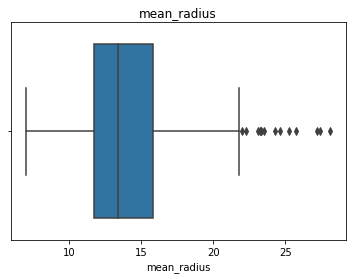

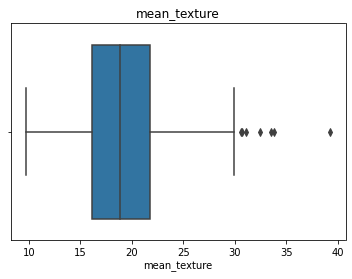

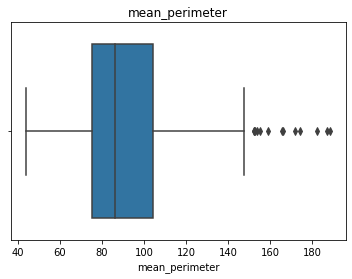

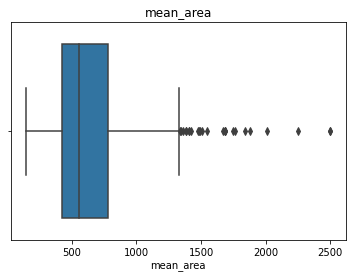

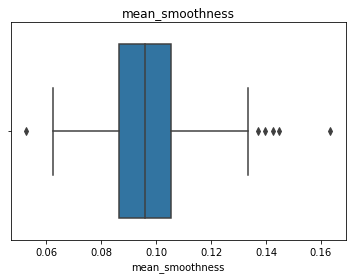

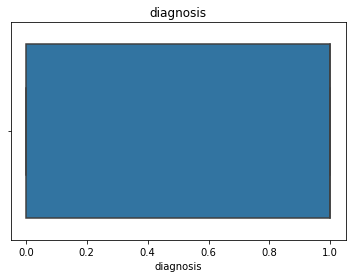

In [12]:
#checking for outliers using boxplots "Before outlier removal"
for column in res_df.columns:
    sns.boxplot(x=res_df[column])
    plt.title(column)
    plt.show()

There are some outliers that we have to remove before we continue with our analysis

In [14]:
#this function 'remove_outliers_IQR' will be used to remove outliers from our whole dataset using the IQR method
def remove_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower) & (data[column] <= upper)]
    return data

# Loop through each column and remove outliers using the remove_outliers_IQR function
for column in res_df.columns:
    res_df = remove_outliers_IQR(res_df, column)



In [16]:
#shape of our data before outlier removal
df.shape

(569, 6)

In [15]:
##shape of our data after outlier removal
res_df.shape

(507, 6)

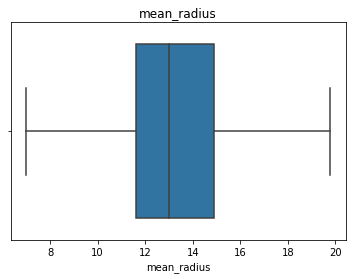

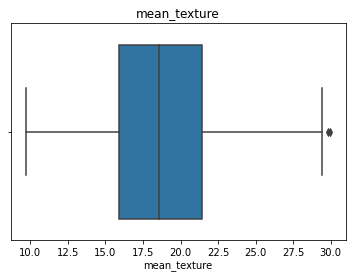

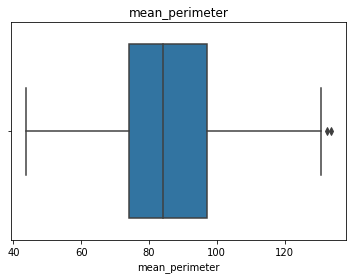

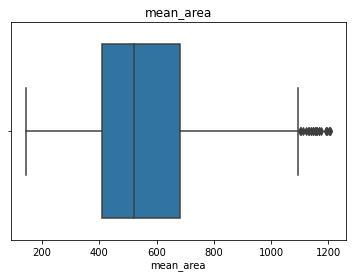

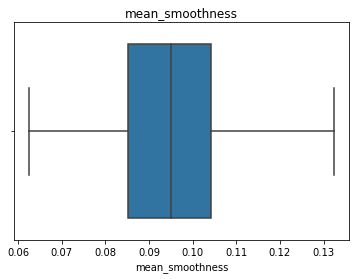

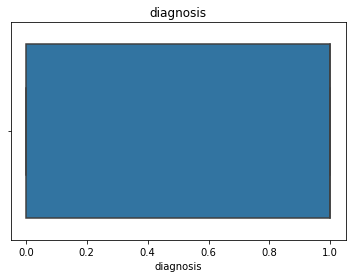

In [17]:
#checking for outliers using boxplots "After outlier removal"
for column in res_df.columns:
    sns.boxplot(x=res_df[column])
    plt.title(column)
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


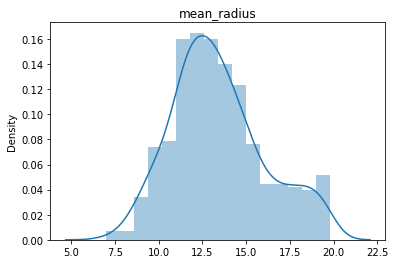

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


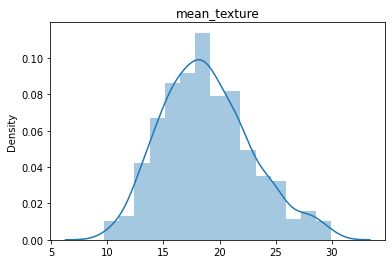

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


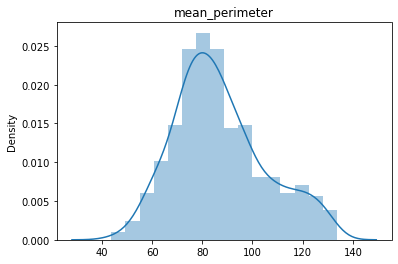

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


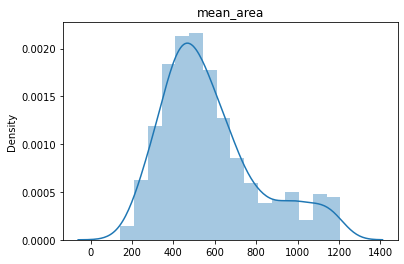

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


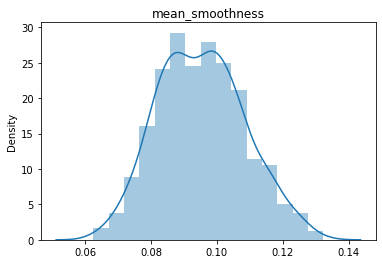

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


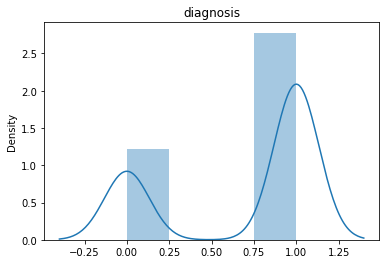

In [18]:

#checking for outliers using boxplots "looking at a ball shape like curve after outlier removal"
for column in res_df.columns:
    sns.distplot(x=res_df[column])
    plt.title(column)
    plt.show()

**Data Visualizations**

In [22]:
df.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.1184,0
2,19.69,21.25,130.0,1203.0,0.1096,0


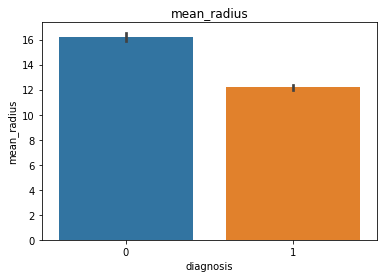

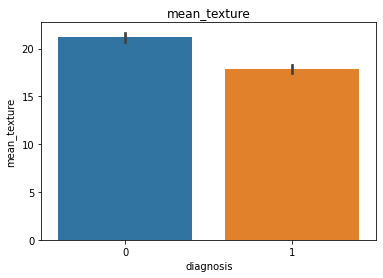

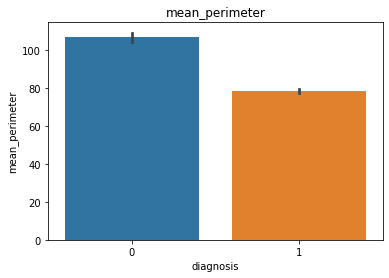

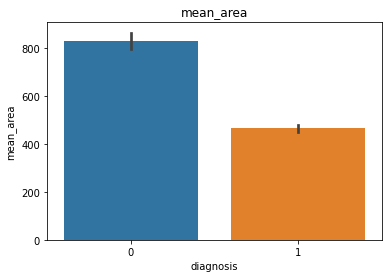

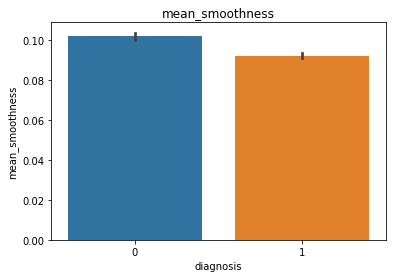

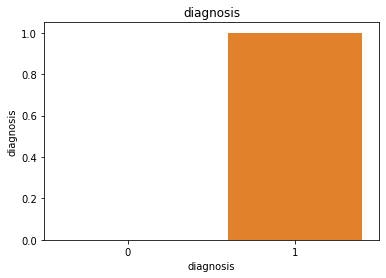

In [39]:
for column in df.columns:
    sns.barplot(x=df['diagnosis'] , y =df[column])
    plt.title(column)
    plt.show()

In [85]:
df_corr=df.corr()


<AxesSubplot:>

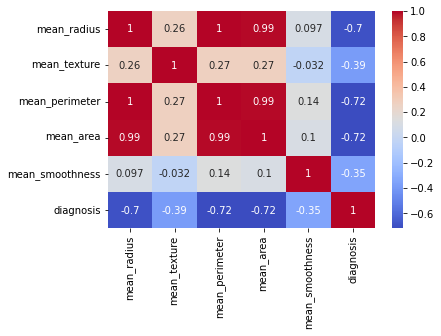

In [86]:
sns.heatmap(df_corr,annot=True,cmap='coolwarm')


**Models**

**Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [52]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [55]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [56]:
preds = model.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [57]:
accuracy_score(preds,y_test),


(0.8823529411764706,)

**Random Forest 2**

In [58]:
#choosing the best number of trees to use 
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

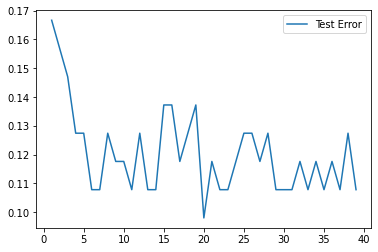

In [59]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [60]:
model2 = RandomForestClassifier(n_estimators=20,max_features='auto',random_state=101)

In [61]:
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=101)

In [63]:
preds2 = model2.predict(X_test)

In [64]:
accuracy_score(preds2,y_test),


(0.9019607843137255,)

**Random Forest Using Grid search**

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
n_estimators=[10,20,40,60,80,100]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [67]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [68]:
model3grid = RandomForestClassifier()
grid = GridSearchCV(model3grid,param_grid)

In [69]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 40, 60, 80, 100],
                         'oob_score': [True, False]})

In [70]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [71]:
predictions = grid.predict(X_test)


In [72]:
grid.best_estimator_.oob_score_

0.9185185185185185

**XGboost**

In [73]:
import xgboost as xgb


In [74]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [75]:
predictions = xgb_model.predict(X_test)


In [76]:
accuracy = accuracy_score(predictions, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8823529411764706


**Logistic Regression**

In [77]:
from sklearn.linear_model import LogisticRegression


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [82]:
LogRegPredict = logreg_model.predict(X_test)

In [84]:
accuracy = accuracy_score(LogRegPredict , y_test)
print(accuracy)

0.8823529411764706
